In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline
import matplotlib
import seaborn as sns
matplotlib.rcParams["figure.figsize"]=(20,10)
df1= pd.read_csv('C:/Users/19bcs/Downloads/archive/spam11.csv')
df1.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [2]:
df1.sample(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
3885,ham,"Same, I'm at my great aunts anniversary party ...",NaN,NaN,NaN
2877,spam,Hey Boys. Want hot XXX pics sent direct 2 ur p...,NaN,NaN,NaN
3393,ham,Bull. Your plan was to go floating off to IKEA...,NaN,NaN,NaN
5008,ham,My mobile number.pls sms ur mail id.convey reg...,NaN,NaN,NaN
690,ham,Was the farm open?,NaN,NaN,NaN


In [3]:
df1.shape

(5572, 5)

In [4]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [5]:
df1.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'], inplace=True)

In [6]:
df1.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [7]:
df1.rename(columns={'v1':'Type','v2':'Text'},inplace=True)
df1.head()

,Type,Text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [8]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()
df1['Type']=encoder.fit_transform(df1['Type'])
df1.head()

,Type,Text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [9]:
df1.sample

<bound method NDFrame.sample of       Type                                               Text
0        0  Go until jurong point, crazy.. Available only ...
1        0                      Ok lar... Joking wif u oni...
2        1  Free entry in 2 a wkly comp to win FA Cup fina...
3        0  U dun say so early hor... U c already then say...
4        0  Nah I don't think he goes to usf, he lives aro...
...    ...                                                ...
5567     1  This is the 2nd time we have tried 2 contact u...
5568     0              Will Ì_ b going to esplanade fr home?
5569     0  Pity, * was in mood for that. So...any other s...
5570     0  The guy did some bitching but I acted like i'd...
5571     0                         Rofl. Its true to its name

[5572 rows x 2 columns]>

In [10]:
df1.isnull()

,Type,Text
0,False,False
1,False,False
2,False,False
3,False,False
4,False,False
...,...,...
5567,False,False
5568,False,False
5569,False,False
5570,False,False


In [11]:
df1.isnull().sum

<bound method DataFrame.sum of        Type   Text
0     False  False
1     False  False
2     False  False
3     False  False
4     False  False
...     ...    ...
5567  False  False
5568  False  False
5569  False  False
5570  False  False
5571  False  False

[5572 rows x 2 columns]>

In [12]:
df1.isnull().sum()

Type    0
Text    0
dtype: int64

In [13]:
df1.duplicated().sum()

403

In [14]:
df1.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
5567    False
5568    False
5569    False
5570    False
5571    False
Length: 5572, dtype: bool

In [15]:
df2=df1.drop_duplicates(keep='first')
df2.duplicated().sum()

0

In [16]:
df2.shape

(5169, 2)

In [17]:
df2['Type'].value_counts()

Type
0    4516
1     653
Name: count, dtype: int64

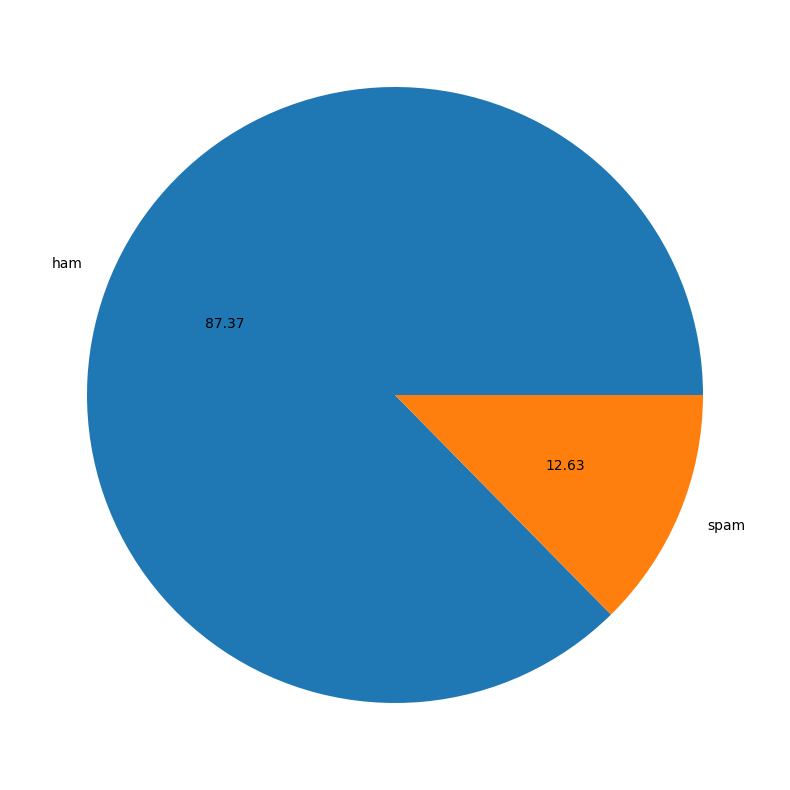

In [18]:
plt.pie(df2['Type'].value_counts(), labels=['ham','spam'],autopct="%0.2f")
plt.show()

In [19]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\19bcs\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [20]:
df2['Text'].apply(len)

0       111
1        29
2       155
3        49
4        61
       ... 
5567    161
5568     37
5569     57
5570    125
5571     26
Name: Text, Length: 5169, dtype: int64

In [21]:
df2['num_alphabetic']=df2['Text'].apply(len)
df2.head()

C:\Users\19bcs\AppData\Local\Temp\ipykernel_16488\3724062368.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['num_alphabetic']=df2['Text'].apply(len)


,Type,Text,num_alphabetic
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [22]:
df2.sample(5)

,Type,Text,num_alphabetic
4635,0,K k pa Had your lunch aha.,26
2960,0,I'm doing da intro covers energy trends n pros...,151
4811,0,"fyi I'm at usf now, swing by the room whenever",46
5350,0,No one interested. May be some business plan.,45
188,0,Have you got Xmas radio times. If not i will g...,55


In [23]:
df2['Text'].apply(lambda x:nltk.word_tokenize(x))

0       [Go, until, jurong, point, ,, crazy, .., Avail...
1                [Ok, lar, ..., Joking, wif, u, oni, ...]
2       [Free, entry, in, 2, a, wkly, comp, to, win, F...
3       [U, dun, say, so, early, hor, ..., U, c, alrea...
4       [Nah, I, do, n't, think, he, goes, to, usf, ,,...
                              ...                        
5567    [This, is, the, 2nd, time, we, have, tried, 2,...
5568     [Will, Ì_, b, going, to, esplanade, fr, home, ?]
5569    [Pity, ,, *, was, in, mood, for, that, ., So, ...
5570    [The, guy, did, some, bitching, but, I, acted,...
5571                  [Rofl, ., Its, true, to, its, name]
Name: Text, Length: 5169, dtype: object

In [24]:
df2['word_count']=df2['Text'].apply(lambda x:len(nltk.word_tokenize(x)))
df2.head()

C:\Users\19bcs\AppData\Local\Temp\ipykernel_16488\4124579657.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['word_count']=df2['Text'].apply(lambda x:len(nltk.word_tokenize(x)))


,Type,Text,num_alphabetic,word_count
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [25]:
df2['Text'].apply(lambda x:nltk.sent_tokenize(x))

0       [Go until jurong point, crazy.., Available onl...
1                        [Ok lar..., Joking wif u oni...]
2       [Free entry in 2 a wkly comp to win FA Cup fin...
3       [U dun say so early hor... U c already then sa...
4       [Nah I don't think he goes to usf, he lives ar...
                              ...                        
5567    [This is the 2nd time we have tried 2 contact ...
5568              [Will Ì_ b going to esplanade fr home?]
5569    [Pity, * was in mood for that., So...any other...
5570    [The guy did some bitching but I acted like i'...
5571                        [Rofl., Its true to its name]
Name: Text, Length: 5169, dtype: object

In [26]:
df2['sent_count']=df2['Text'].apply(lambda x:len(nltk.sent_tokenize(x)))
df2.head()

C:\Users\19bcs\AppData\Local\Temp\ipykernel_16488\2662894361.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['sent_count']=df2['Text'].apply(lambda x:len(nltk.sent_tokenize(x)))


,Type,Text,num_alphabetic,word_count,sent_count
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [27]:
df2[['num_alphabetic', 'word_count', 'sent_count']].describe()

,num_alphabetic,word_count,sent_count
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.455794,1.965564
std,58.236293,13.324758,1.448541
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [28]:
df2[df2['Type']==0][['num_alphabetic', 'word_count', 'sent_count']].describe()

,num_alphabetic,word_count,sent_count
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [29]:
df2[df2['Type']==1][['num_alphabetic', 'word_count', 'sent_count']].describe()

,num_alphabetic,word_count,sent_count
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


<Axes: xlabel='num_alphabetic', ylabel='Count'>

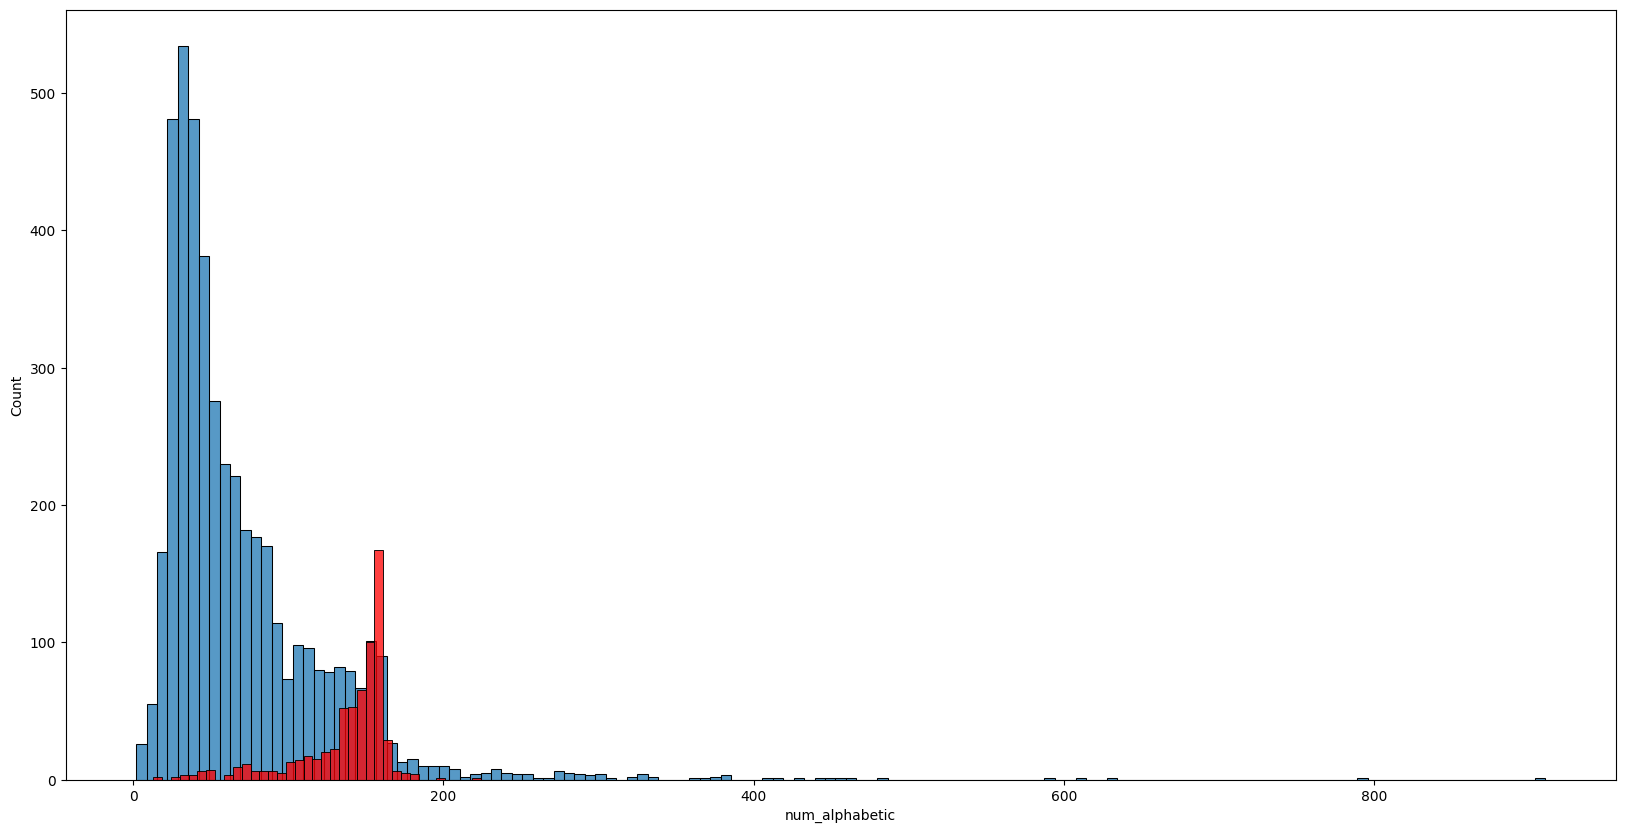

In [30]:
sns.histplot(df2[df2['Type']==0]['num_alphabetic'])
sns.histplot(df2[df2['Type']==1]['num_alphabetic'],color='red')

<Axes: xlabel='word_count', ylabel='Count'>

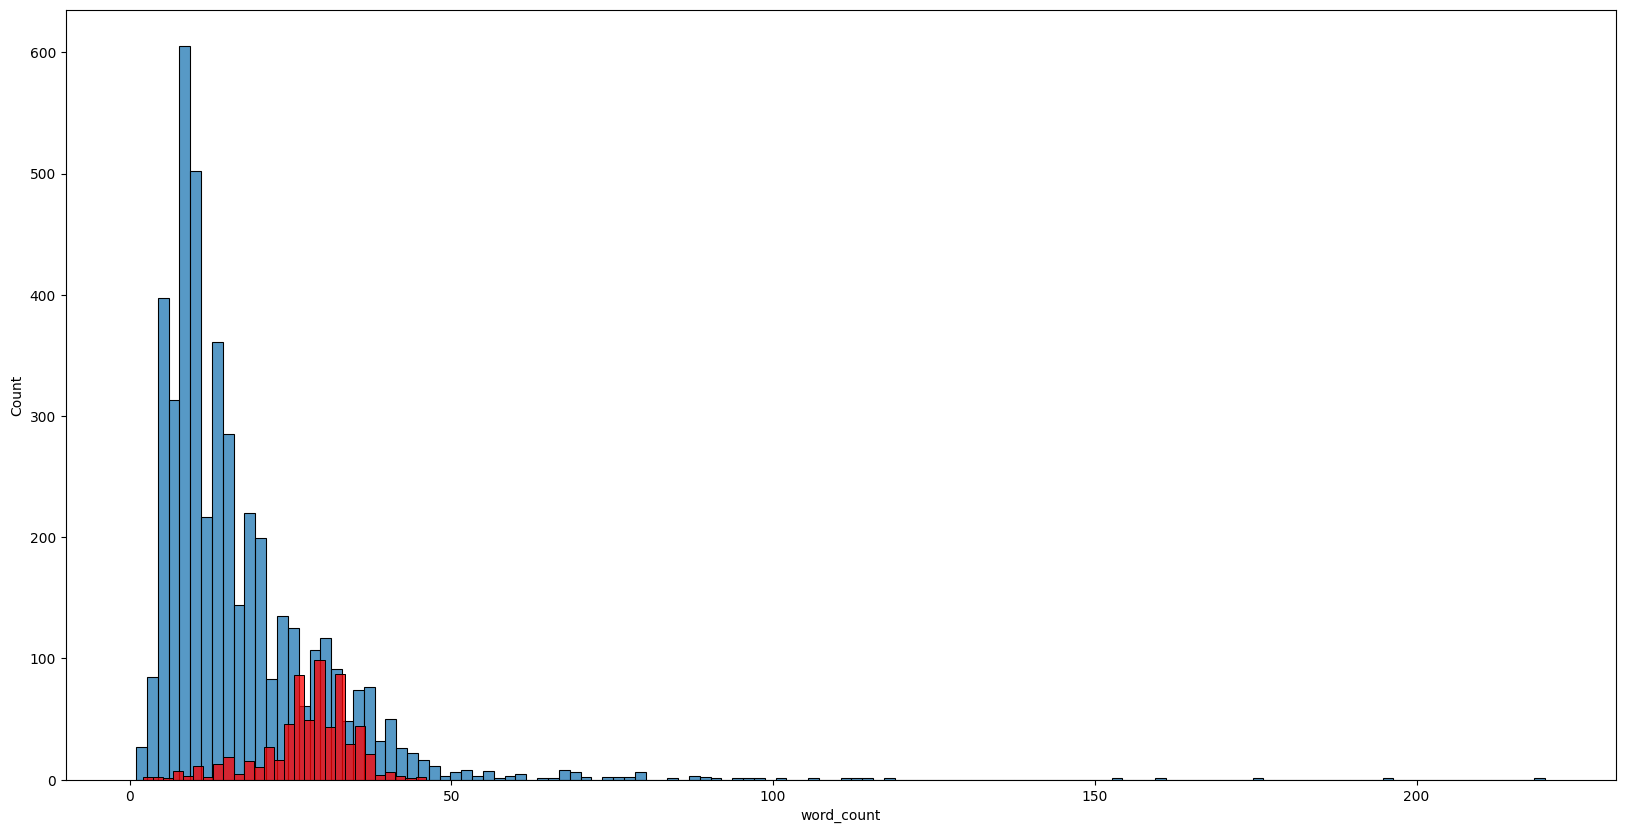

In [31]:
sns.histplot(df2[df2['Type']==0]['word_count'])
sns.histplot(df2[df2['Type']==1]['word_count'],color='red')

<Axes: xlabel='sent_count', ylabel='Count'>

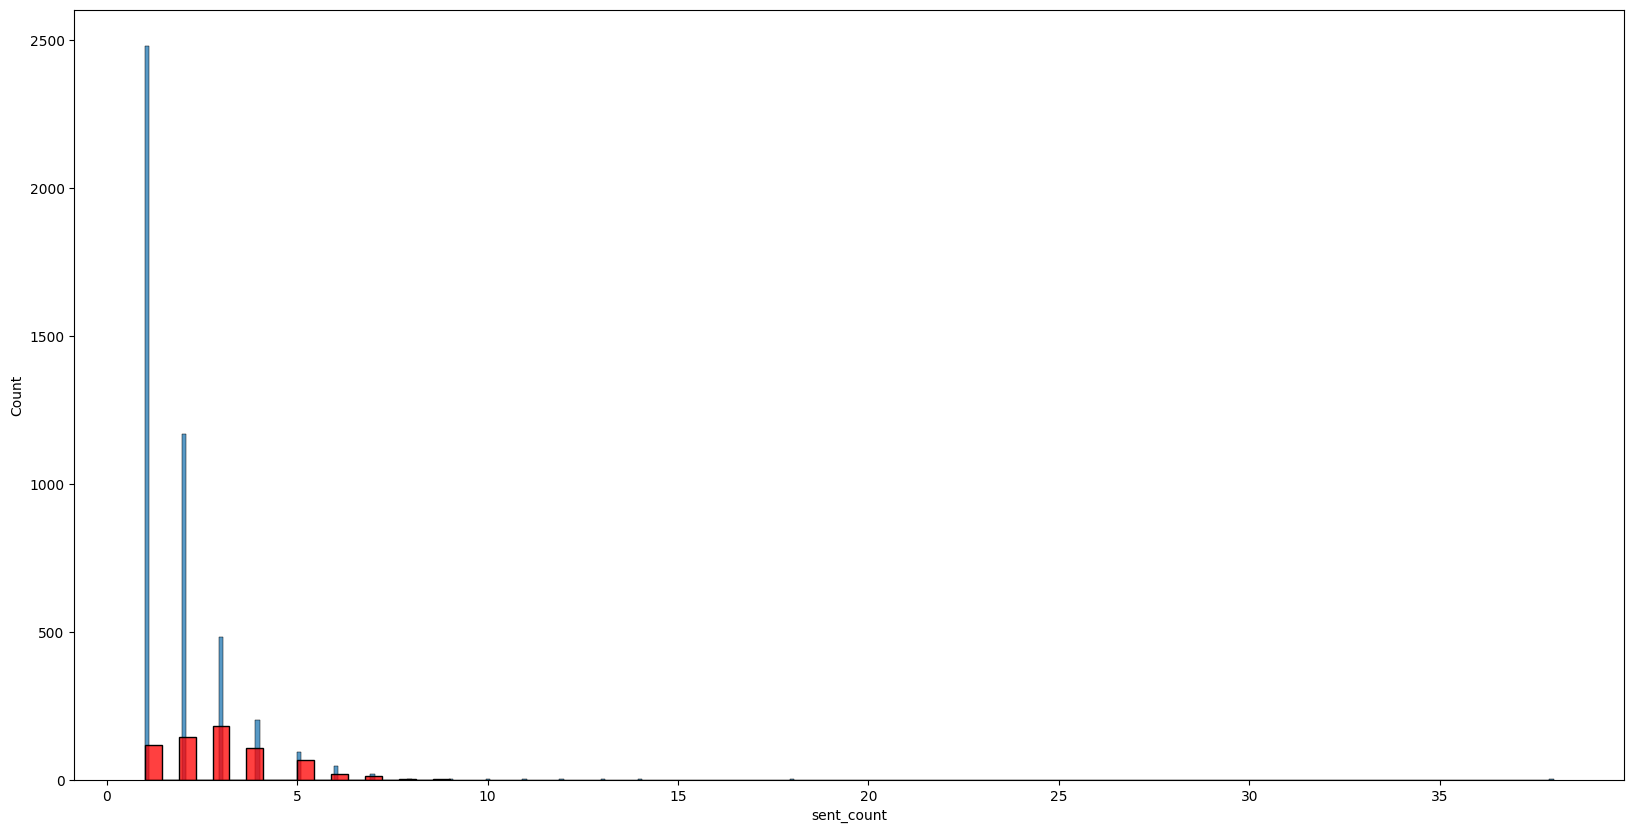

In [32]:
sns.histplot(df2[df2['Type']==0]['sent_count'])
sns.histplot(df2[df2['Type']==1]['sent_count'],color='red')

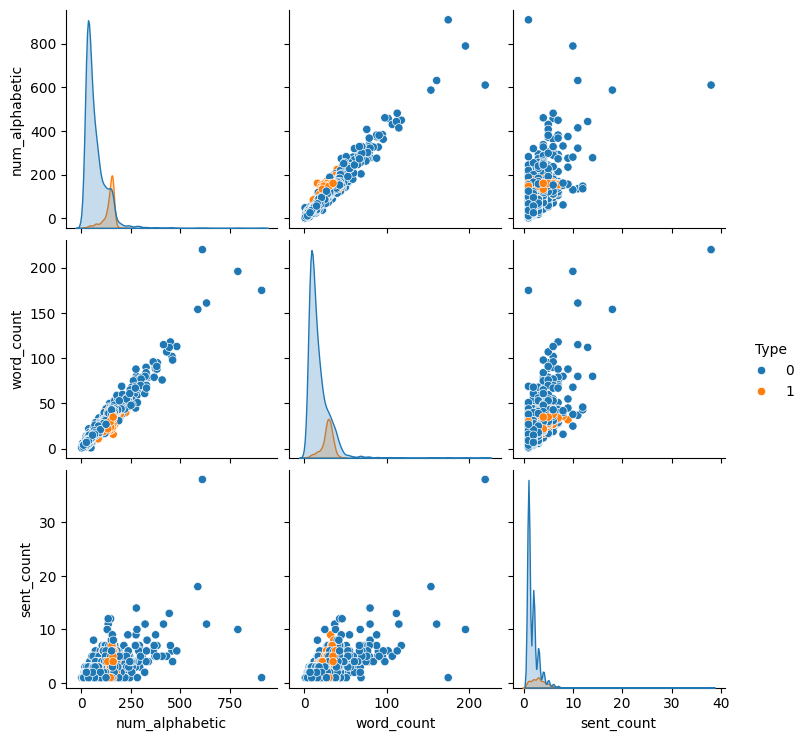

In [33]:
sns.pairplot(df2,hue='Type')

In [34]:
df2.head()

,Type,Text,num_alphabetic,word_count,sent_count
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [35]:
df2.corr

<bound method DataFrame.corr of       Type                                               Text  num_alphabetic  \
0        0  Go until jurong point, crazy.. Available only ...             111   
1        0                      Ok lar... Joking wif u oni...              29   
2        1  Free entry in 2 a wkly comp to win FA Cup fina...             155   
3        0  U dun say so early hor... U c already then say...              49   
4        0  Nah I don't think he goes to usf, he lives aro...              61   
...    ...                                                ...             ...   
5567     1  This is the 2nd time we have tried 2 contact u...             161   
5568     0              Will Ì_ b going to esplanade fr home?              37   
5569     0  Pity, * was in mood for that. So...any other s...              57   
5570     0  The guy did some bitching but I acted like i'd...             125   
5571     0                         Rofl. Its true to its name              26

In [36]:
# df3=df2.drop(columns=['Text'], inplace=True)
# df3.head()

In [37]:
df2.corr()

ValueError: could not convert string to float: 'Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...'

In [ ]:
sns.heatmap(df2.corr(),annot=True)

In [38]:
from nltk.corpus import stopwords
stopwords.words('english')

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [39]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [40]:
from nltk.stem.porter import PorterStemmer
ps=PorterStemmer()
ps.stem('loving')

'love'

In [41]:
def transform_text(text):
    text=text.lower()
    text=nltk.word_tokenize(text)
    y=[]
    for i in text:
        if i.isalnum():
            y.append(i)
    text=y[:]
    y.clear()
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
           y.append(i) 
    text=y[:]
    y.clear()
    for i in text:
        y.append(ps.stem(i))
    return " ".join(y)

In [42]:
# import nltk
# nltk.download()

In [43]:
transform_text('I loved the YT lectures on machine Learning. how about you?')

'love yt lectur machin learn'

In [44]:
transform_text('Go until jurong point, crazy.. Available ')

'go jurong point crazi avail'

In [45]:
df2.head()

,Type,Text,num_alphabetic,word_count,sent_count
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [46]:
df2['transformed_text'] = df2['Text'].apply(transform_text)
df2.head()

C:\Users\19bcs\AppData\Local\Temp\ipykernel_16488\3940712145.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['transformed_text'] = df2['Text'].apply(transform_text)


,Type,Text,num_alphabetic,word_count,sent_count,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [47]:
from wordcloud import WordCloud
wc=WordCloud(width=500,height=500,min_font_size=10,background_color='white')

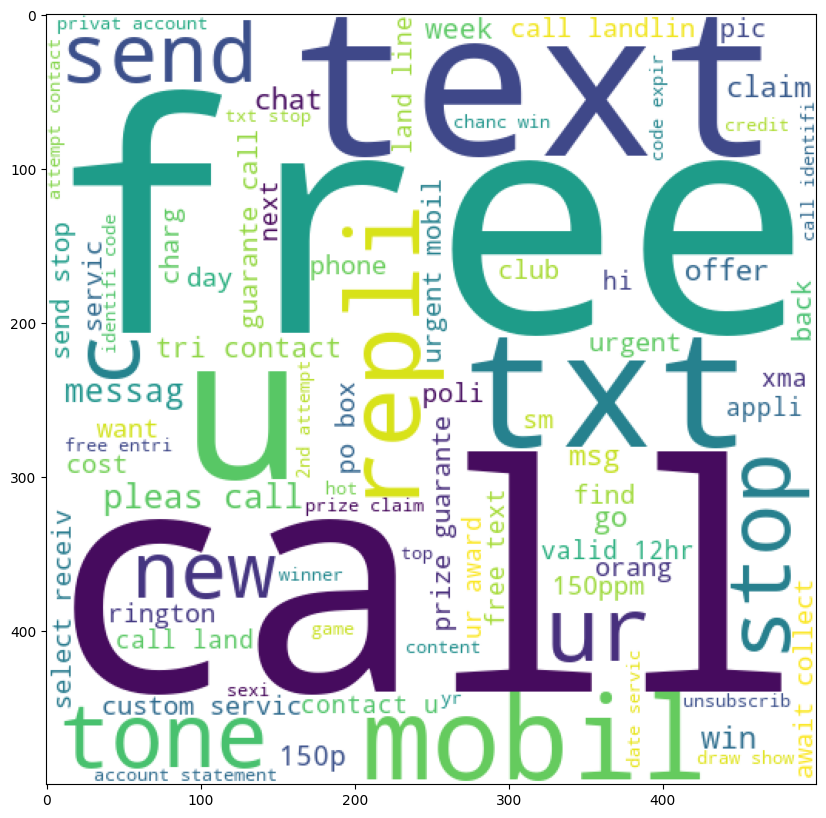

In [48]:
spam_wc=wc.generate(df2[df2['Type']==1]['transformed_text'].str.cat(sep=" "))
plt.imshow(spam_wc)

In [49]:
# !pip install wordcloud

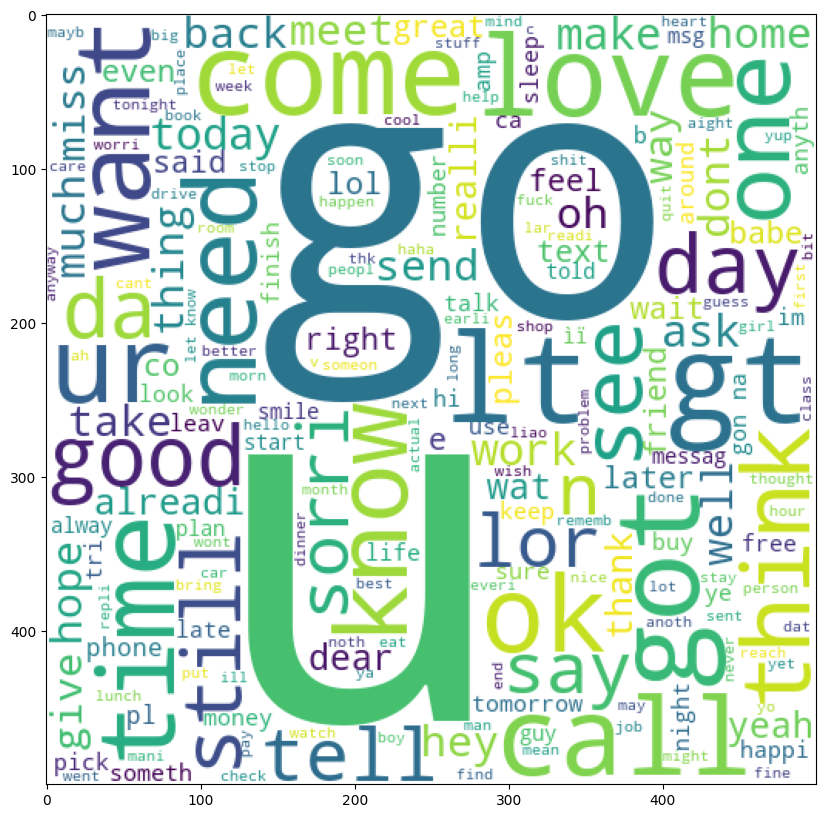

In [50]:
ham_wc=wc.generate(df2[df2['Type']==0]['transformed_text'].str.cat(sep=" "))
plt.imshow(ham_wc)

In [51]:
df2.head()

,Type,Text,num_alphabetic,word_count,sent_count,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [52]:
spam_corpus=[]
for msg in df2[df2["Type"]==1]['transformed_text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)

In [53]:
len(spam_corpus)

9939

<Axes: xlabel='0', ylabel='1'>

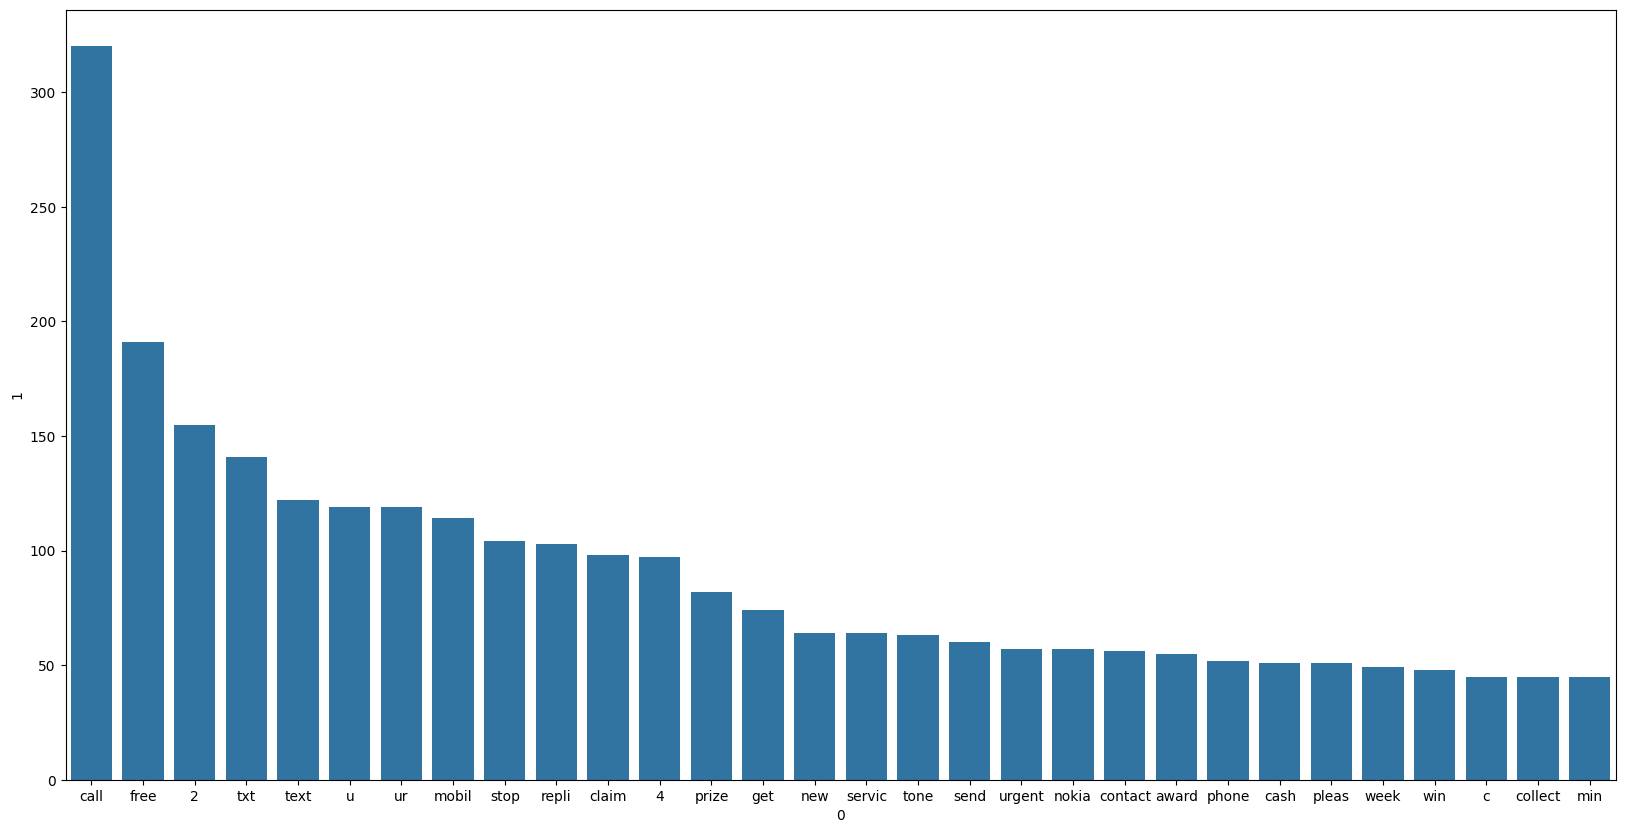

In [54]:
from collections import Counter
sns.barplot(x=pd.DataFrame(Counter(spam_corpus).most_common(30))[0],y=pd.DataFrame(Counter(spam_corpus).most_common(30))[1])

In [55]:
ham_corpus=[]
for msg in df2[df2["Type"]==0]['transformed_text'].tolist():
    for word in msg.split():
        ham_corpus.append(word)
len(ham_corpus)

35404

In [56]:
cmn_occ_in_ham=pd.DataFrame(Counter(ham_corpus).most_common(30))
cmn_occ_in_ham

,0,1
0,u,883
1,go,404
2,get,349
3,gt,288
4,lt,287
5,2,284
6,come,275
7,got,236
8,know,236
9,like,234


<Axes: xlabel='0', ylabel='1'>

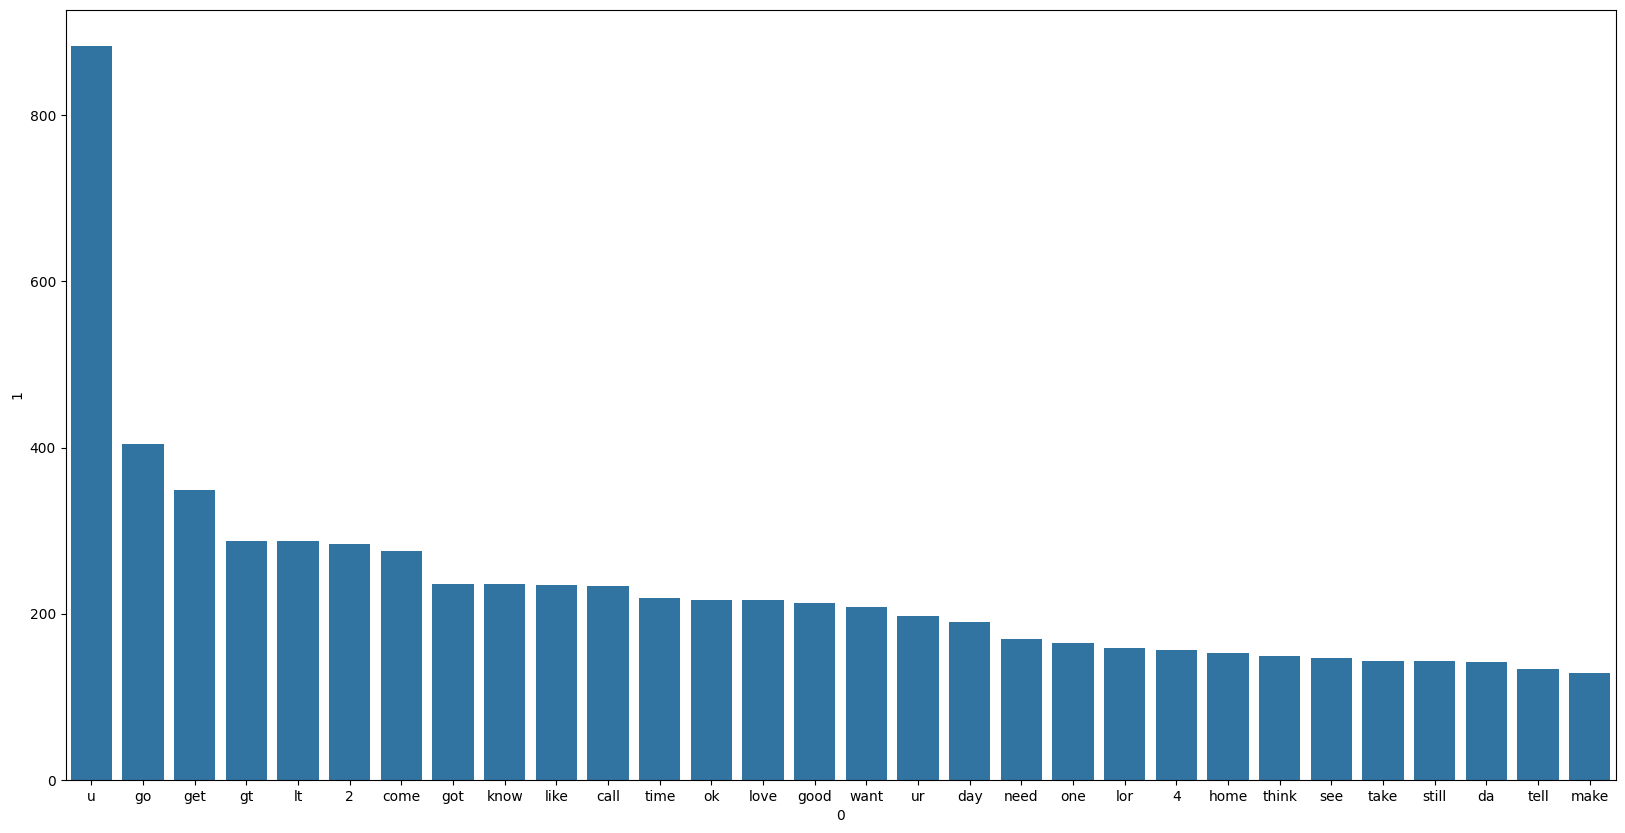

In [57]:
sns.barplot(x=cmn_occ_in_ham[0],y=cmn_occ_in_ham[1])

In [58]:
df2.head()

,Type,Text,num_alphabetic,word_count,sent_count,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [59]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
tf=TfidfVectorizer()
cv=CountVectorizer()

In [60]:
X=tf.fit_transform(df2['transformed_text']).toarray()

In [61]:
X.shape

(5169, 6708)

In [62]:
y=df2['Type'].values
y

array([0, 0, 1, ..., 0, 0, 0])

In [63]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=2)

In [64]:
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import MultinomialNB
mnb=MultinomialNB()
bnb=BernoulliNB()
gnb=GaussianNB()

In [65]:
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [66]:
gnb.fit(X_train,y_train)
y_pred1= gnb.predict(X_test)
print("Accuracy_Score: ",accuracy_score(y_test, y_pred1))
print(confusion_matrix(y_test, y_pred1))
print("Precision_score: ",precision_score(y_test, y_pred1)*100,"%")

Accuracy_Score:  0.8762088974854932
[[793 103]
 [ 25 113]]
Precision_score:  52.31481481481482 %


In [67]:
bnb.fit(X_train,y_train)
y_pred1= bnb.predict(X_test)
print("Accuracy_Score: ",accuracy_score(y_test, y_pred1))
print("Confusion Matrix :",confusion_matrix(y_test, y_pred1))
print("Precision_score: ",precision_score(y_test, y_pred1)*100,"%")

Accuracy_Score:  0.9700193423597679
Confusion Matrix : [[893   3]
 [ 28 110]]
Precision_score:  97.34513274336283 %


In [68]:
mnb.fit(X_train,y_train)
y_pred1= mnb.predict(X_test)
print("Accuracy_Score: ",accuracy_score(y_test, y_pred1))
print(confusion_matrix(y_test, y_pred1))
print("Precision_score: ",precision_score(y_test, y_pred1)*100,"%")

Accuracy_Score:  0.9593810444874274
[[896   0]
 [ 42  96]]
Precision_score:  100.0 %
